## 이상치를 찾아라
### 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오
- 강의 영상 : https://youtu.be/ipBW5D_UJEo
- 데이터셋 : titanic 
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 데이터 위치 "../input/titanic/train.csv" (copy&edit가 아닐 경우 별도로 데이터셋 불러와야 함)

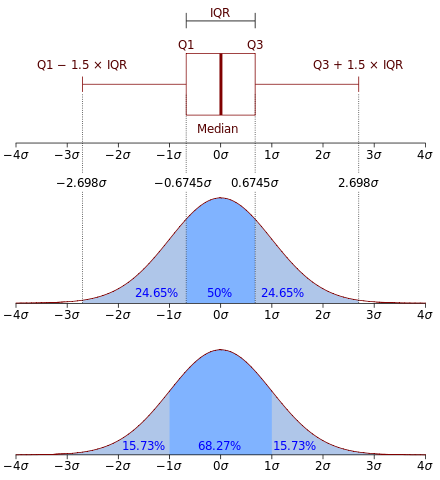

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/titanic/train.csv')

In [2]:
# 간단한 탐색적 데이터 분석 (EDA)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
# IQR 구하기
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
# 이상치 데이터 구하기
up = 31+1.5*(31-7.910400)
down = 7.910400-1.5*(31-7.910400)

print(up)
print(down)

65.6344
-26.724


In [8]:
# IQR 구하기
Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)
IQR = Q3 - Q1

up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

print(up)
print(down)

65.6344
-26.724


In [9]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
# 이상치 데이터 갯수
print(len(df[df['Fare']>up]))
print(len(df[df['Fare']<down]))

# 여성데이터 중 이상치 갯수
print(len(df[(df['Fare']>up) & (df['Sex']=='female')]))
print(len(df[(df['Fare']<down) & (df['Sex']=='female')]))

116
0
70
0


## Hint

In [10]:
# IQR 구하기
# Q1 = np.percentile(df[col], 25)
# Q3 = np.percentile(df[col], 75)
# IQR = Q3 - Q1
# Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

## 해답

In [11]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('../input/titanic/train.csv')

In [12]:
# 간단한 탐색적 데이터 분석 (EDA)
print(df.shape)
print(df.isnull().sum())
df.head()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [13]:
# IQR 구하기
Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)
IQR = Q3 - Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

(-26.724, 65.6344)

In [14]:
# 이상치 데이터 구하기
outdata1 = df[df['Fare']<(Q1 - 1.5 * IQR)]
outdata2 = df[df['Fare']>(Q3 + 1.5 * IQR)]
len(outdata1), len(outdata2)

(0, 116)

In [15]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
print(sum(outdata2['Sex'] == 'female'))

70
